### Ecommerce Data Analysis

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('EcommercePurchases.csv')
data.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [3]:
data.dtypes

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object

In [4]:
data.describe()

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.000000,10000.000000
mean,2.341374e+15,907.217800,50.347302
std,2.256103e+15,1589.693035,29.015836
min,6.040186e+10,0.000000,0.000000
25%,3.056322e+13,280.000000,25.150000
50%,8.699942e+14,548.000000,50.505000
75%,4.492298e+15,816.000000,75.770000
max,6.012000e+15,9993.000000,99.990000


In [5]:
data.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

In [6]:
data.shape

(10000, 14)

In [7]:
print("Maximum Purchase Price is ", data['Purchase Price'].max())
print("Minimum Purchase Price is ", data['Purchase Price'].min())

Maximum Purchase Price is  99.99
Minimum Purchase Price is  0.0


In [8]:
for column in data.columns:
    print("Number of zeroes in ", column , "is ", (data[column]==0).sum())

Number of zeroes in  Address is  0
Number of zeroes in  Lot is  0
Number of zeroes in  AM or PM is  0
Number of zeroes in  Browser Info is  0
Number of zeroes in  Company is  0
Number of zeroes in  Credit Card is  0
Number of zeroes in  CC Exp Date is  0
Number of zeroes in  CC Security Code is  8
Number of zeroes in  CC Provider is  0
Number of zeroes in  Email is  0
Number of zeroes in  Job is  0
Number of zeroes in  IP Address is  0
Number of zeroes in  Language is  0
Number of zeroes in  Purchase Price is  2


In [9]:
print("Average Purchase Price is ", data['Purchase Price'].mean())

Average Purchase Price is  50.34730200000025


In [10]:
print("Number of people having fr as their language is ", (data['Language'] == 'fr').sum())

Number of people having fr as their language is  1097


In [11]:
engineer_count = len(data[data['Job'].str.contains('engineer',case=False)])
print("Number of engineers are ", engineer_count)

Number of engineers are  984


In [12]:
print(data[data['IP Address'] == '132.207.160.22']['Email'])

2    amymiller@morales-harrison.com
Name: Email, dtype: object


In [13]:
len(data[(data['CC Provider'] == 'Mastercard') & (data['Purchase Price'] > 50)])

405

In [14]:
data[data['Credit Card'] == 4664825258997302]['Email']

9992    bberry@wright.net
Name: Email, dtype: object

C:\Users\vaish\OneDrive\Desktop\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AM or PM', ylabel='count'>

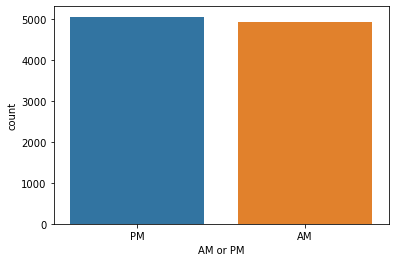

In [15]:
sns.countplot(data['AM or PM'])

In [16]:
data['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [17]:
string = "Hello/World"
string.split("/")

['Hello', 'World']

In [18]:
count = 0
for date in data['CC Exp Date']:
    if date.split("/")[1] == '20':
        count+=1
print(count)
        

988


In [19]:
new_email_list = []
for email in data['Email']:
    value = email.split('@')[1]
    new_email_list.append(value)

In [20]:
data[ 'Email Provider'] = new_email_list
data['Email Provider'].value_counts()

hotmail.com            1638
yahoo.com              1616
gmail.com              1605
smith.com                42
williams.com             37
                       ... 
booker.com                1
woods-allen.biz           1
richards-wilson.com       1
morris-thomas.com         1
wade-garner.com           1
Name: Email Provider, Length: 3416, dtype: int64